In [1]:
%pylab inline

import numpy as np
import pandas as pd

from IPython import display

Populating the interactive namespace from numpy and matplotlib


## Would You Be Impressed?

<!-- PELICAN_BEGIN_SUMMARY -->

When I was in middle school, I listened to a near-exclusive rotation of the first two Linkin Park albums, The Eminem Show, and Demon Days by Gorillaz. Then High School came and went and I got... really into post-hardcore. Today, a glance at my Spotify history would reveal that listening to "that angry screaming music" was indeed, "not a phase, Mom."

But no band has had as much staying power on me than Streetlight Manifesto.

Perhaps I was doomed to love this band-- I did marching band all throughout high school and college and found them at a time when I was frantically seeking out all of the *punk* that this skapunk ensemble out of Jersey had to offer. Nearly all of their songs checked my "aggressive, nihilist, kinetic sound" boxes but also did so with a *dizzying* level of technical skill. As a consequence, it's been the musical crux of the majority of my friendships growing up.

Eventually, I found myself at enough of their shows that things became second-nature. I developed a good understanding of when the pit would be high or low energy, when folks would start clapping along, or all of the ways their live renditions were different from their albums. I genuinely don't know how many times I've seen them, but Streetlight coming to town has always been an event steeped in the familiar and shared with the people important in my life.

So imagine my surprise when my group catches our umpteenth show together and we hear them play a song for the first time live. And a pretty old one, at that. Moreover, a **real** bummer of a song that you almost don't want to dance to.

<!-- PELICAN_END_SUMMARY -->

Make no mistake, it's an undeniably beautiful tune-- and with enough punchy hornline to get everyone moving-- but after the first 20 seconds of [As the Footsteps Die Out Forever](https://www.youtube.com/watch?v=GfN6awYogGo), Tomas launches into an emotional narrative about a son learning that his mother is terminally ill.

Its first verse reads:

```
She was diagnosed on a Friday
The kids were almost home
The kids were on their way back home from school
Lying face down in the gutter
Of unaccomplished dreams
And broken memories of things to come
"Sorry ma'am, I really am. I had to break the news
I had to make the phone call to tell you that you're due
You know where, I'll tell you when
And I suggest that you start living these next three weeks
The best way that you can."
```

[and stays as heavy and lovingly-raw throughout](https://genius.com/Catch-22-as-the-footsteps-die-out-forever-lyrics). Woof.

I wasn't the only one surprised it made the setlist. A friend I'd seen them with a good number of times, now living in Baltimore, saw them earlier in their tour and felt it was noteworthy enough to snag a recording.

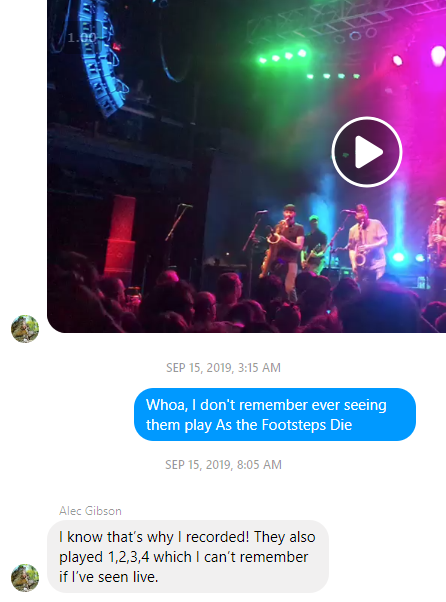

In [2]:
display.Image('images/alec.PNG')

Come to think of it, I couldn't remember if I had, either. Which obviously made it a prime candidate for some digging.

But before we could answer "How much of a B-Side *was* this song?" we'd need some data.

## That'll Be the Day(s of Various Shows)

For starters, I had a stroke of blind luck doing a simple Google search on "Streetlight Manifesto setlist."

Doing so dropped me at [a cool little site of crowdsourced lists of the tracks pulled out at each show](https://www.setlist.fm/setlists/streetlight-manifesto-6bd68a52.html). Maybe this would be easier to answer than I'd thought.

I had a fun afternoon exercising old webscraping muscles with `requests` and `BeautifulSoup` (GitHub links at the bottom). Essentially, I found that there were basically two different kinds of pages that I needed to be able to parse:

- The actual show-level pages with the track listing for a given date (e.g. [this](https://www.setlist.fm/setlist/streetlight-manifesto/2019/royal-oak-music-theatre-royal-oak-mi-b9c1d2e.html))
- The top-level "dates of shows" pages had URLs like `https://www.setlist.fm/setlists/streetlight-manifesto-6bd68a52.html?page=`. I'd just make a simple loop adding in page numbers at the end and find the links to the show-level pages outlined above.

After I'd gotten it up and running, I could get raw data on years' worth of shows. Then packaging it into something `pandas`/tabular allowed me to spot-check and find interesting dates-- like [the time they covered a Suicide Machines tune in 2004](https://www.setlist.fm/setlist/streetlight-manifesto/2004/the-stone-pony-asbury-park-nj-23dc007f.html), or when they straight-up had to cancel a show [because they almost literally brought the house down](https://www.setlist.fm/setlist/streetlight-manifesto/2013/waiting-room-buffalo-ny-13c7d159.html).

### (Data) Hell

Predictably, as anyone with experience web scraping manually-entered sites will tell you, I ran into a good deal of data quality headaches that needed addressing.

For starters, there were the obvious considerations of spelling, punctuation, capitalization, and other keyboard-related hiccups. Some "lowercase everything" and Regex Magic™ made short work of this.

Then there was the issue of titling. For example, they do this thing live where the splice their songs "Keasbey Nights" and "Point / Counterpoint." Listening to it, this feels like a no-brainer as they're both upbeat songs and in the same key ([here's a pretty good fan edit](https://www.youtube.com/watch?v=Mo6R06f0zbQ), the break's around 4:15), it's a lot of fun. But from a data perspective, it's an unoffical song and there's no "right" way to title it. Thus, I saw more variations on `point / keasbey / counterpoint / nights` than I care to elaborate.

Which isn't to say that I'm dispariging!

Messy data is objectively more useful than no data. Which is precisely what I found after combing over my resulting tables. Turns out a good number of shows (particularly those with older dates) didn't have any tracks listed whatsoever.

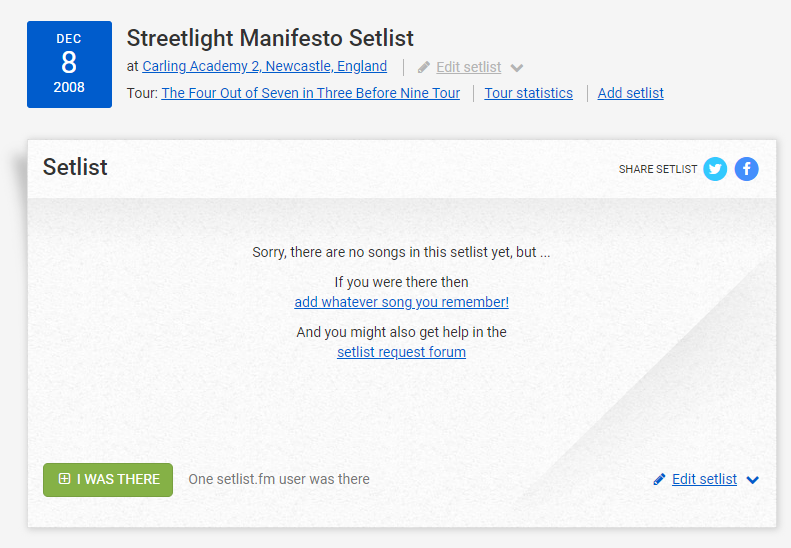

In [3]:
display.Image('images/no_records.PNG')

Or better yet, the show would not be listed at all. My brother still has his printed ticket from the first time we saw them way back when

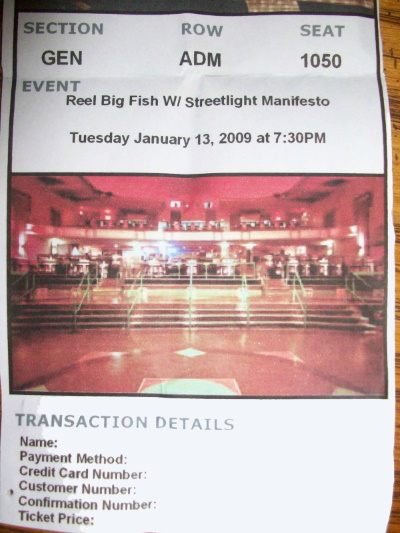

In [4]:
display.Image('images/first_show.jpg')

and lo and behold, [January 13th, 2009 is nowhere to be found on this site](https://www.setlist.fm/setlists/streetlight-manifesto-6bd68a52.html?page=39), where (at the time of writing) the date should be located.

But you work with what you have. So let's do just that.

### Failing, Flailing

Loading up the dataset after a ton of collection and cleaning, we've got a big ol' table of 380 different shows against the 57 songs that appear on their albums

In [5]:
from get_data import load_data

df = load_data()

df.shape

(380, 57)

Printing out the first few rows, we've got a mess that mobile users will no-doubt scroll right on by, lol

In [6]:
df.head()

,everything went numb,that'll be the day,point / counterpoint,if and when we rise again,"a better place, a better time",we are the few,"failing, flailing",here's to life,a moment of silence,a moment of violence,...,the three of us,ungrateful,the littlest things,the hands that thieve,with any sort of certainty,if only for memories,they broke him down,toe to toe,"oh me, oh my",your day will come
dates,,,,,,,,,,,,,,,,,,,,,
2009-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As mentioned above, we've got a lot of shows listed that are outright missing data.

Looking at the "count of tracks per show" we have the following

In [7]:
df.sum(axis=1).value_counts().sort_index()

0     124
1       3
2       1
3       1
4       1
5       3
6       5
7       4
8      13
9       8
10      2
11      1
12      6
13      8
14     36
15     50
16     59
17     33
18     17
19      1
20      2
23      2
dtype: int64

Eyeballing, it seems as if the majority of our shows have 7+ songs, so we'll trim our dataset down to remove the incomplete entries and a few one-offs.

In [8]:
trimmed = df[df.sum(axis=1) >= 7]
trimmed.shape

(242, 57)

We still have almost 250 shows worth of (imperfect but usable) data to work with. Nice.

## The Receiving End of It All

One of the best first things you can do after you've got your data cleaned is to find a good way to visualize it. Here I opted for a simple bar chart that highlights both the popularity of individual songs as well as albums as whole.

The tracks are listed chronologically from top to bottom, each album divided by the red lines.

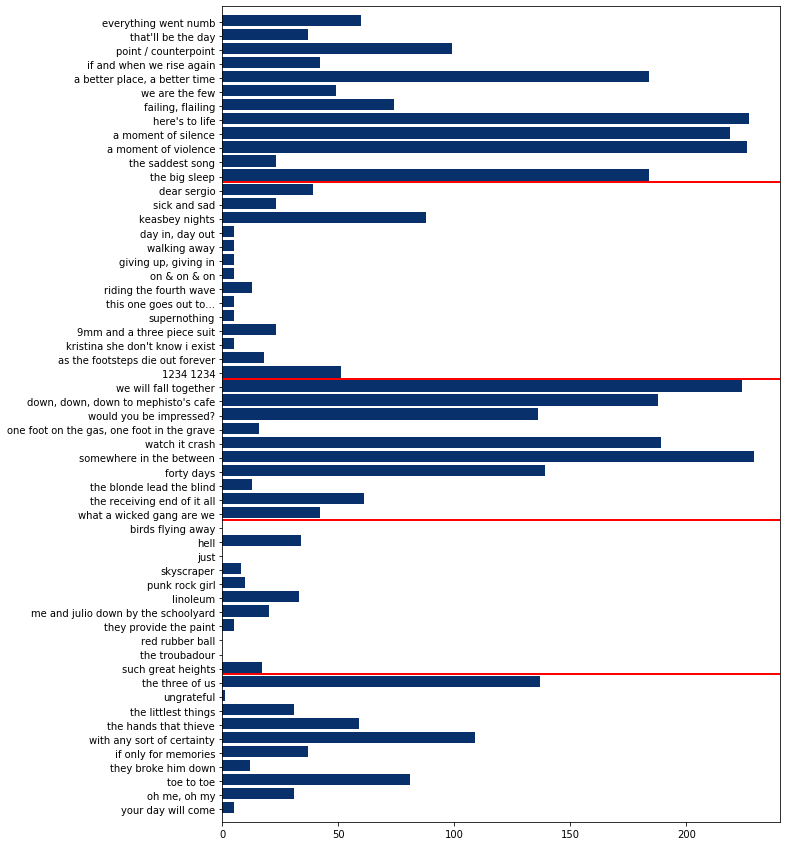

In [9]:
from viz import plot_all_time_plays

plot_all_time_plays(trimmed);

And this makes pretty good sense to me. 

A bit of background on the albums for the uninitiated:

- *Everything Goes Numb (2003)*: This is their oldest album, so go figure its tracks have an impressive overall play count
- *Keasbey Nights (2006)*: A track by track re-recording of an album by a band the lead singer used to be in. [It's this whole thing](https://en.wikipedia.org/wiki/Keasbey_Nights#Streetlight_Manifesto_version). Not a ton of overlap with the two groups touring at the same time, but the low play-count makes sense. Especially since a year later we get...
- *Somewhere in the Between (2007)*: My personal favorite. Cover to cover bangers and formative as hell for High-School Nick.
- *99 Songs of Revolution: Vol. 1 (2010)*: Perhaps inappropriately-titled "Vol. 1," this was an album exclusively of covers, years before Weezer made it cool. It was a huge hit in my friend group and having gotten into the band in '08, the first of their albums I picked up at launch. However, despite the overwhelming demand from a dozen midwestern teenagers, most of the tracks didn't get their moment in the sun at live shows-- most noteably [their cover of Radiohead's Just](https://www.youtube.com/watch?v=TZnsNexCMg0), which is probably in my top 10 covers of anything.
- *The Hands That Thieve (2013)*: The last album they put out which kicked off, to everyone's dismay, The End Of The Beginning Tour. [They put out a press release](https://dyingscene.com/news/streetlight-manifesto-to-quit-year-round-touring/) outlining the twilight years of Streetlight Manifesto as we know it.

>We’ve solidified plans to tour our well-traveled asses off for one last year, until the end of 2013, at which time we will be not necessarily be moving on from the band, but changing our approach to what we do with the majority of our time. More specifically, we will no longer be touring year round, nor will we be touring much at all anymore. We have decided to step away from the table before we get sick of our favorite meal;

Group chats were abuzz, Facebook blew up, as everyone I'd shared this band with clamored to buy tickets for The Last Streetlight Show™. The end was nigh.

They'd then go on to steadily perform 150+ shows over the following 6 years, lol

### Day in, Day Out

Of course, flat play counts are interesting to look at, but don't tell the whole story.

When you take a look at how often songs are played together (the darker squares below), you start to get a good intuition for your typical setlist, should you see them live.

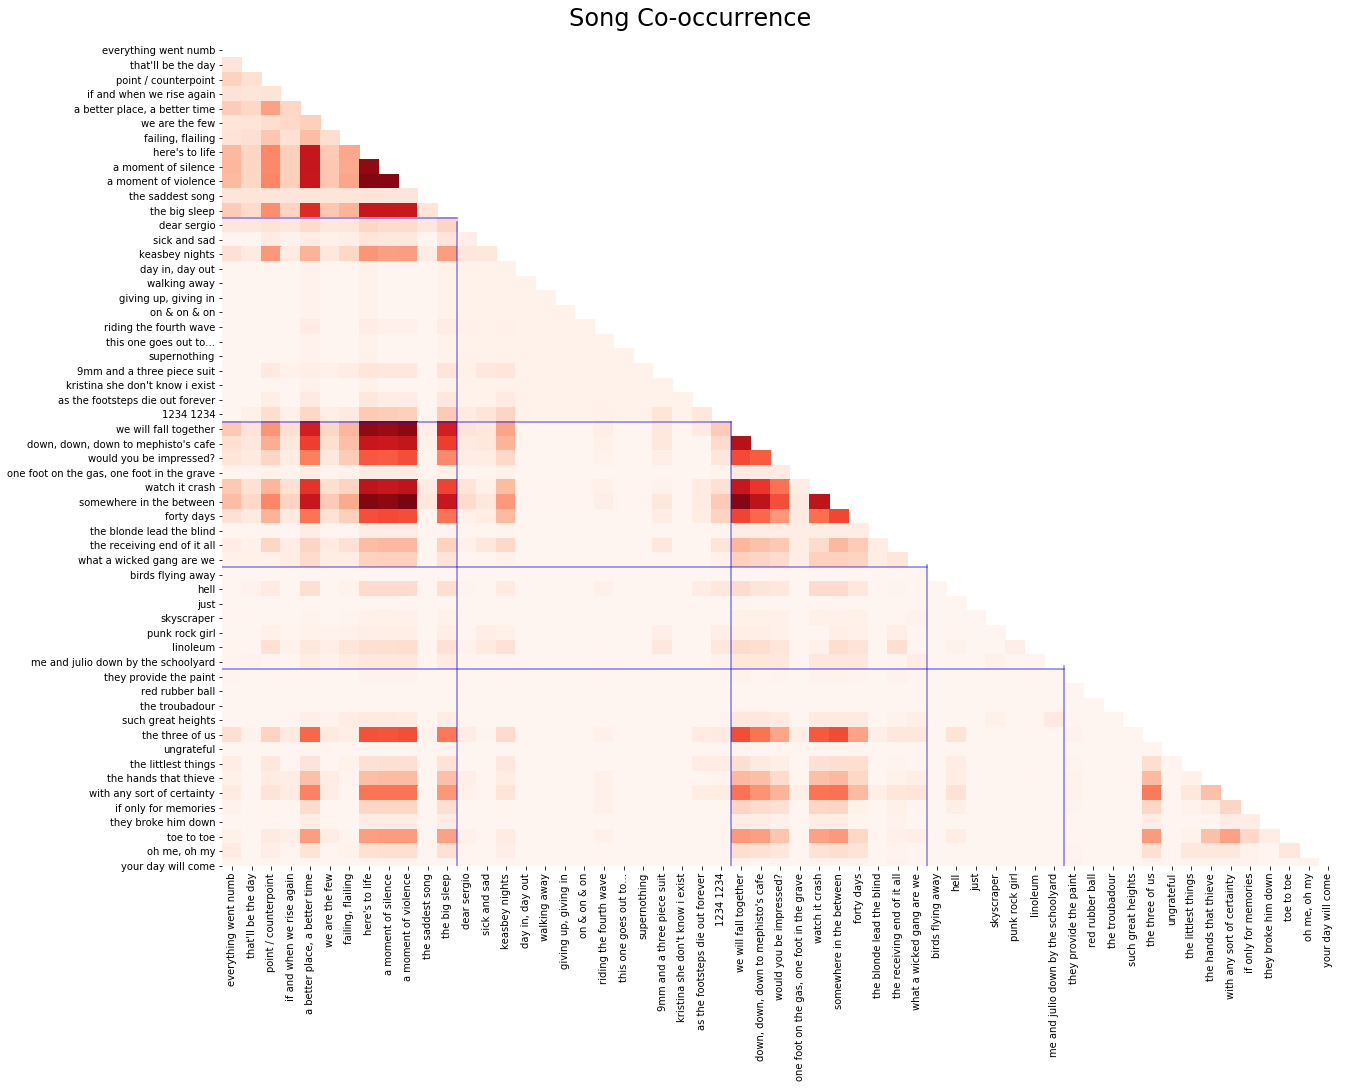

In [10]:
from viz import cooccurrence_heatmap

cooccurrence_heatmap(trimmed);

Notably, "Moment of Silence" is almost always played alongside "Moment of Violence" because being there for [this number](https://youtu.be/xSDansvaEz8?t=331) is as rowdy as it is fun. "Watch it Crash" has [my favorite horn line feature that they play](https://youtu.be/yFEYPXheiiM?t=209) so I'm always happy to hear that. "Somewhere in the Between" is usually their closer. Yada yada yada.

But going back to the original motivation for getting at this data, if you trace the squares represented by "As the Footsteps Die Out Forever", there's really not a whole lot going on. The song doesn't co-occur with much because it really doesn't... occur.

Of course, this visualization basically drowns out information about our B-Sides by the nature of its design.

### We Will Fall Together

When we normalize the co-occurences by how often the songs actually get played we get a bit more insight.

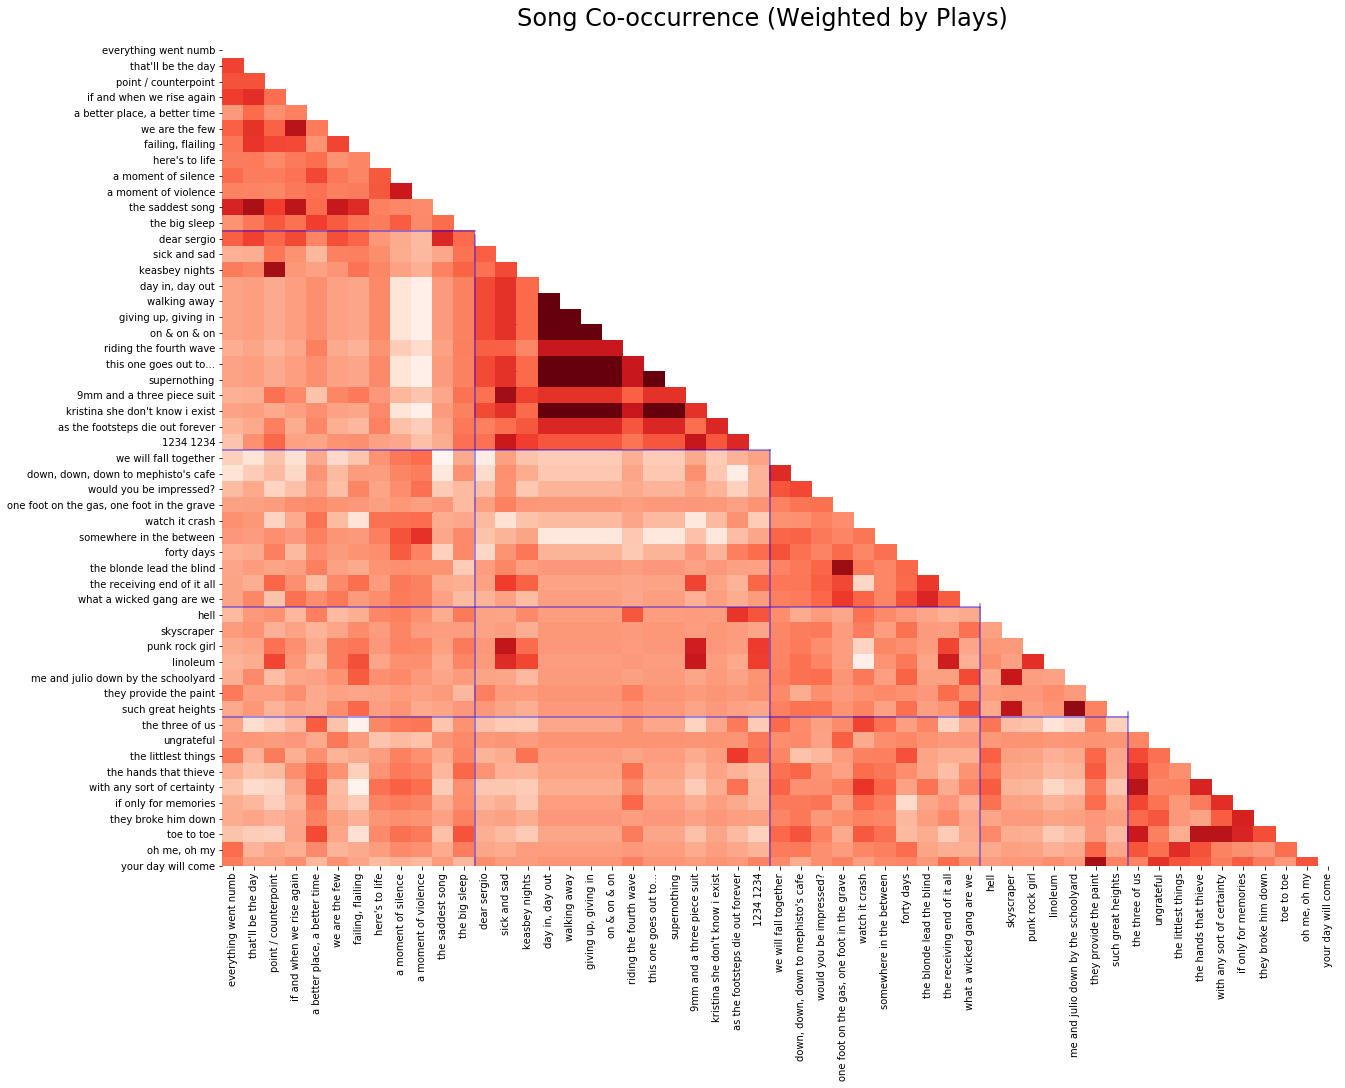

In [11]:
cooccurrence_heatmap(trimmed, play_weighted=True);

A few intersections stick out to me in particular:

- ("Keasbey Nights, "Point/Counterpoint"): As mentioned above, they very regularly merge the two together if they're getting played at all.
- ("The Blonde Lead the Blind", "One Foot On the Gas, One Foot in the Grave"): Both awesome songs, often played together in the couple years after their album dropped in '07. Similarly, they both kind of fell off together, shouldered out by newer, more-popular songs.
- ("Such Great Heights", "Me and Julio Down By the Schoolyard"): Same rationale as above, but this one particularly stings. [Just listen to the first 30 seconds](https://www.youtube.com/watch?v=i_6KTZgayxg).

In general, though, there's a clear patten happening *at the album level*. 

Looking at the triangles along the diagonal, you'd expect to see some album-to-album correlation-- typically as bands release new material, they take it on the road. But the darkness of the *Keasbey Nights* album stands out starkly, which is totally consistent with the low play count these tracks have, overall.

In fact at a glance, it seems as if the tracks were all played together... [which is exactly what happened, apparently](https://twitter.com/SManifesto/status/973614824839036928).

### As the Footsteps (Don't) Die Out Forever

And so filtering down all of our shows where they played the song, we can see that the first 5 times it shows up in our data are these *Keasbey Nights* album events.

In [12]:
atfdof = trimmed['as the footsteps die out forever'] == 1

trimmed[atfdof].index[:5]

DatetimeIndex(['2018-05-04', '2018-05-05', '2018-07-20', '2018-07-25',
               '2018-12-21'],
              dtype='datetime64[ns]', name='dates', freq=None)

Then, 21 years after its initial release and 13 years after its re-release, "As the Footsteps Die Out Forever" starts making the regular rotation in [their 2019 tour dates.](https://www.setlist.fm/search?artist=6bd68a52&query=tour:%28Thieves+In+The+Night+Tour+2019%29)

In [13]:
trimmed[atfdof].index[5:]

DatetimeIndex(['2019-06-28', '2019-06-29', '2019-07-13', '2019-07-26',
               '2019-07-28', '2019-07-29', '2019-07-30', '2019-08-01',
               '2019-08-03', '2019-09-13', '2019-09-27', '2019-09-28',
               '2019-09-29'],
              dtype='datetime64[ns]', name='dates', freq=None)

Huh. Mystery solved. Hearing this tune on their latest tour *is* something of an outlier.

## The Littlest Things 

Before we go-- I had all of this data and I'd spent a good amount of time slicing it, aggregating it, manipulating it.

But I wanted to figure out a way to look at everything at once. This was about the cleanest representation I could come up with. Nevertheless, get your zoom ready, haha

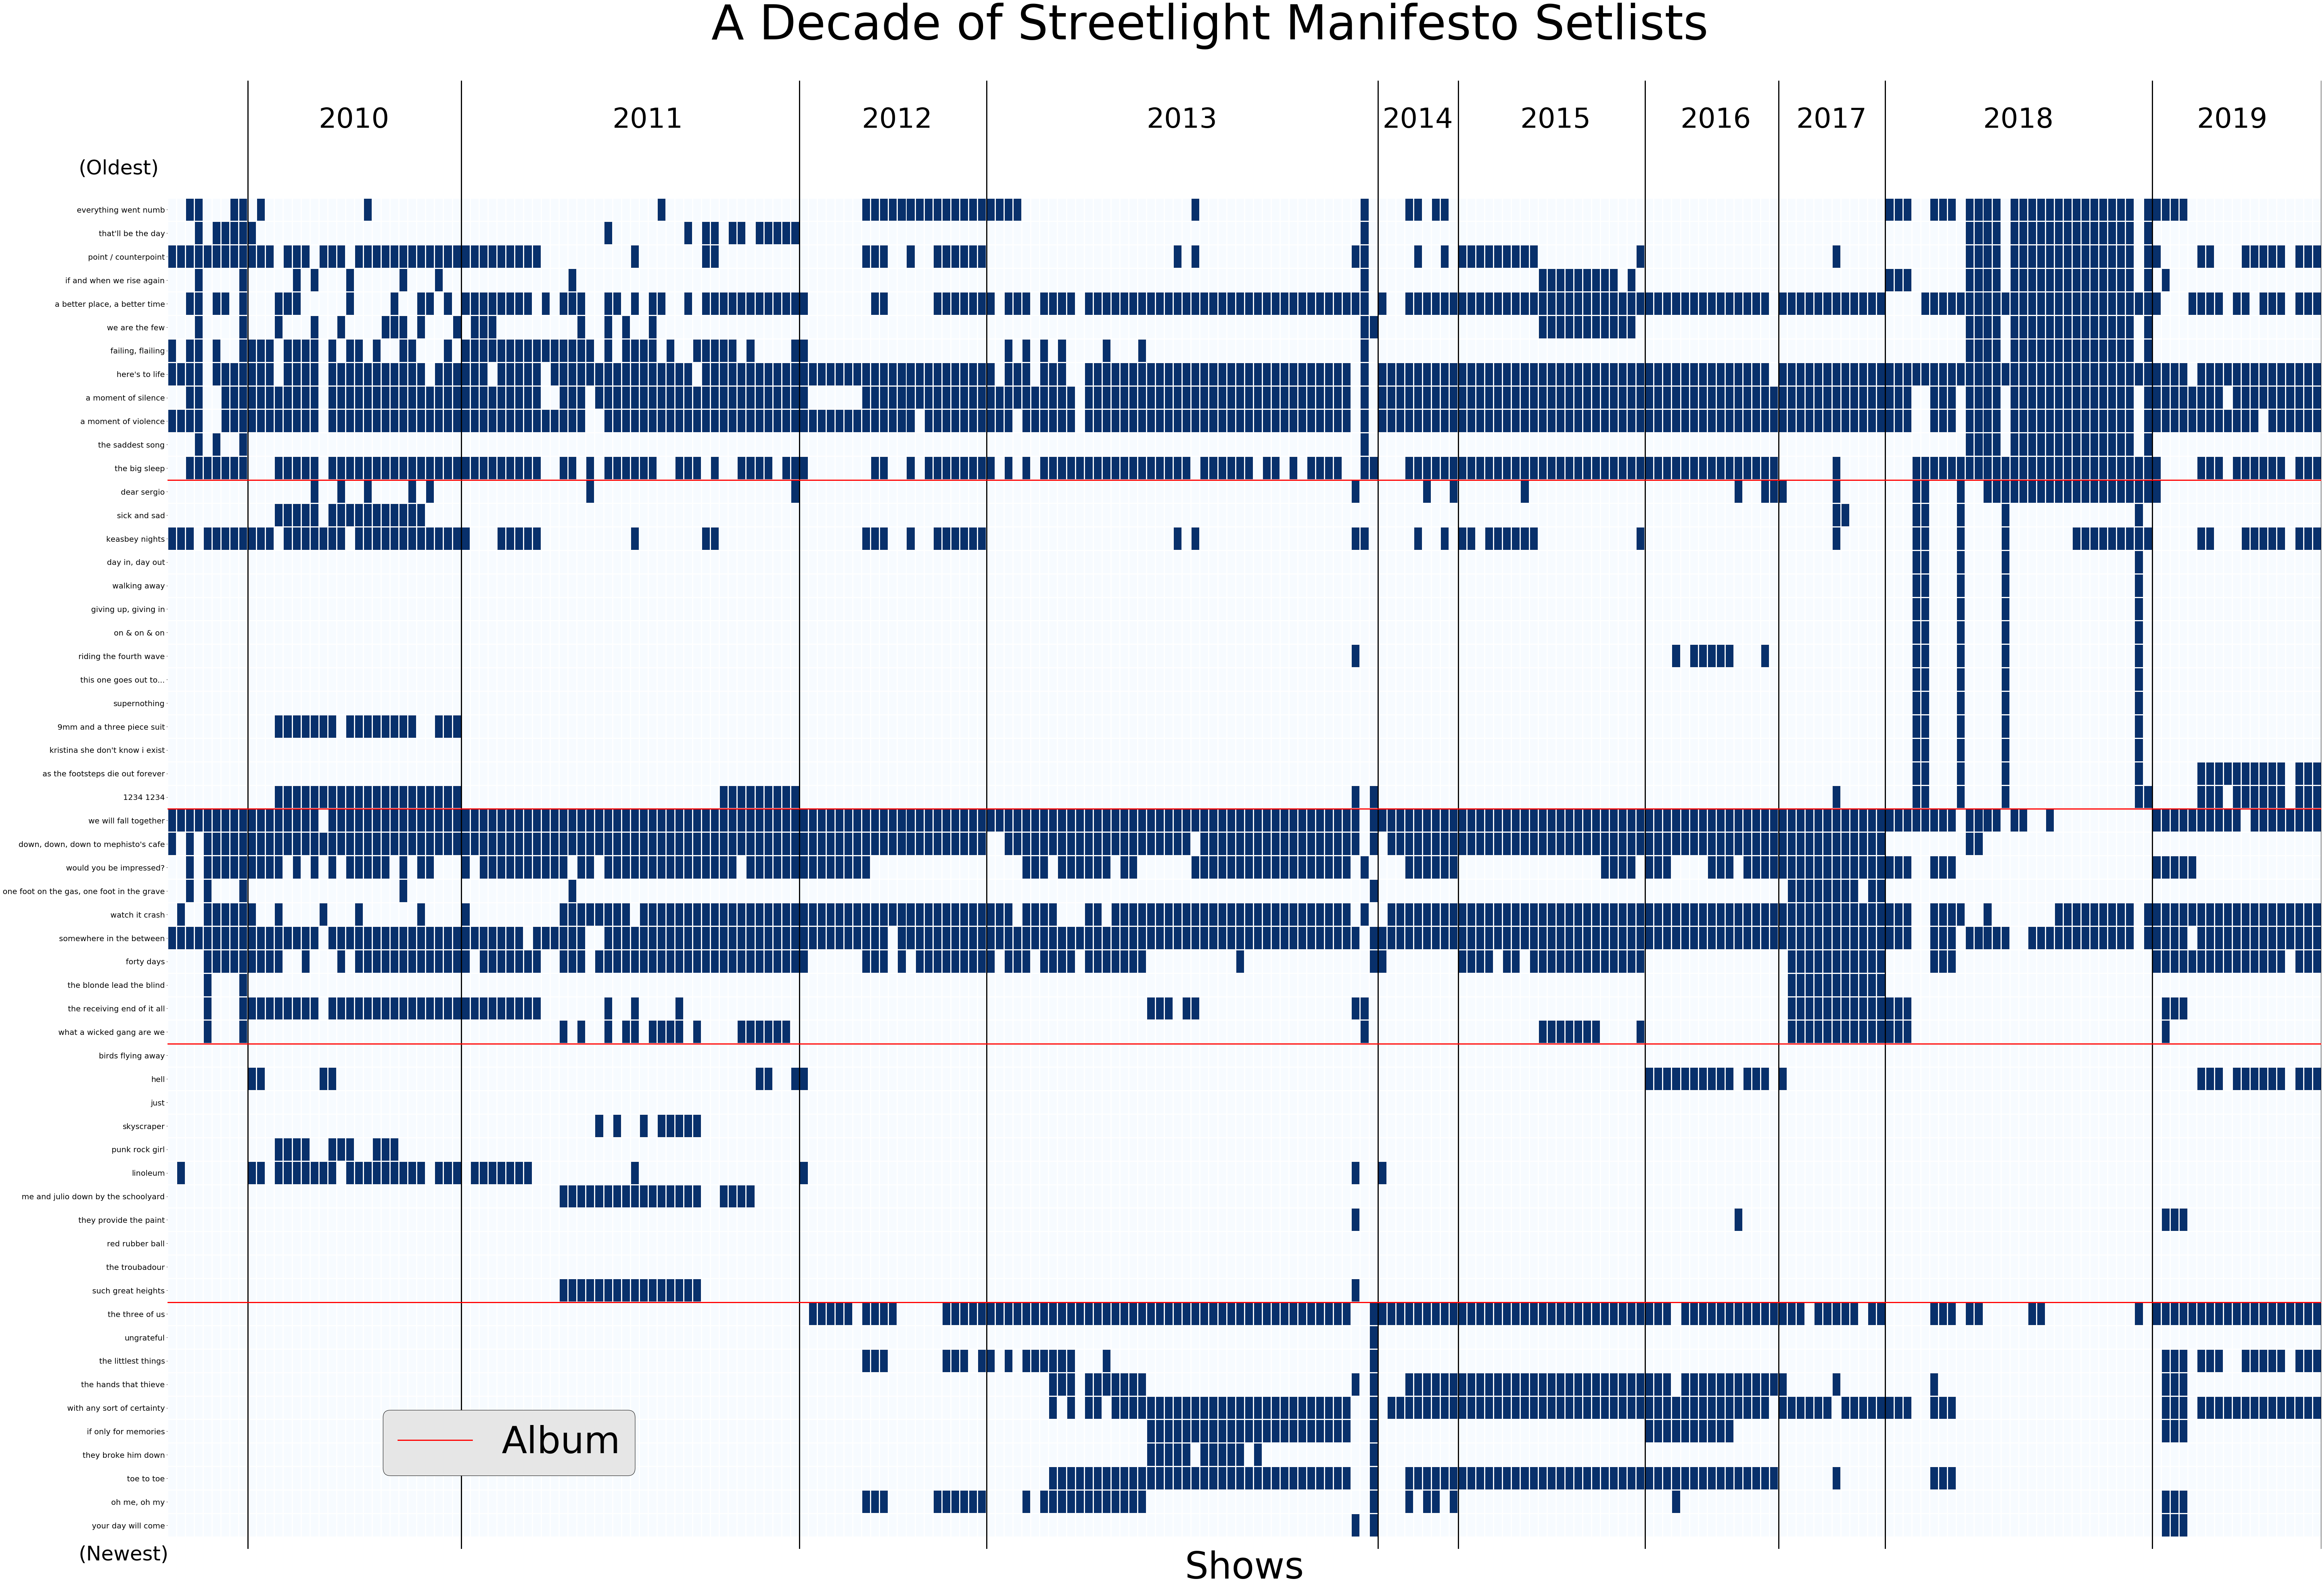

In [14]:
from viz import make_setlist_heatmap

make_setlist_heatmap(trimmed);

The tracks are organized along the left and with enough zooming and scrolling, you can write your own narrative around each track, but broadly this shows us:

- The staying power of some of their more popular tracks
- Various, rare one-offs over the years
- The heavy rotation of *Hands that Thieve* tracks after its 2013 release
- The, by contrast, polite recital of tracks off of *99 Songs* after *its release* in 2010
- The "All Keasbey" and "All Everything Goes Numb" shows they put on in 2018

Not for nothing-- regardless of how busy as this graphic is, I'd still happily take on more data along the X-axis... or the Y :)

## This One Goes Out to...

This blog post was the result of a spark of curiosity, some handily available data, and a few evenings of free time.

After the data came together and after I figured out the functions that would go into creating some of these visuals, the analytical narrative pretty much wrote itself. I'd anticipated a decent technical challenge in putting everything together, but what I didn't foresee was the downright assault of nostalgia.

I started seeing these shows with my best group of friends when **one** (or some fraction of one) of us could grow convincing facial hair.

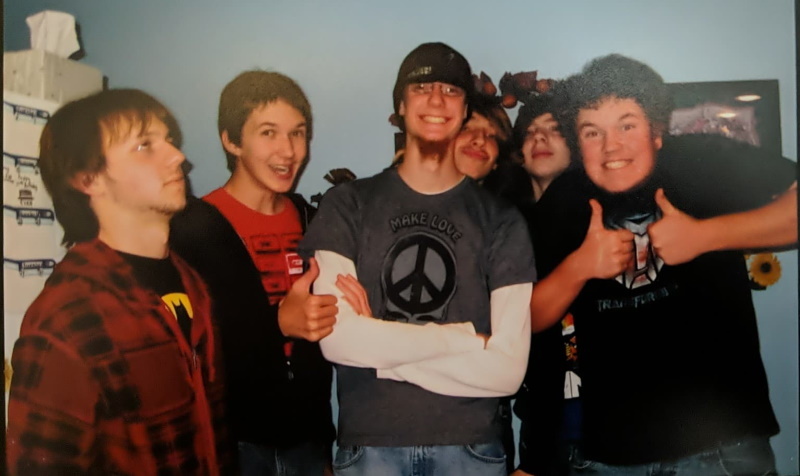

In [15]:
display.Image('images/throwback.jpg')

Not long after we were getting dropped off at shows, we all did the "go to different schools and do our own thing" number that childhood friends always do. And in spamming the group chat asking for pictures and historical fact-checking for this post, notifications popped up on several phones I couldn't up and drive to be around.

But its been one of my greatest joys in life, making the time to get together to play board games, watch YouTube garbage, and catch the errant Streetlight show or two.

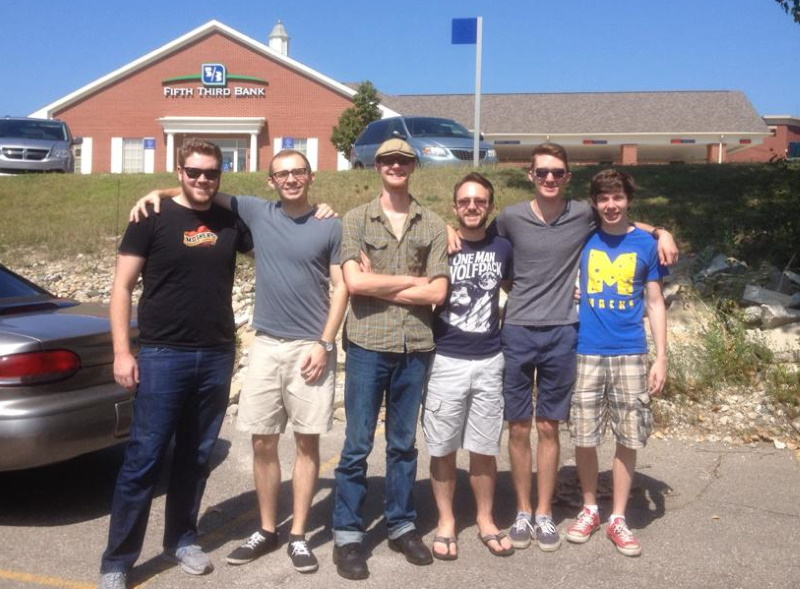

In [16]:
display.Image('images/2015.jpg')

I'm very lucky to have such an awesome, enduring friend group across all of these years. Through the introduction of friends, brothers, fiancées...

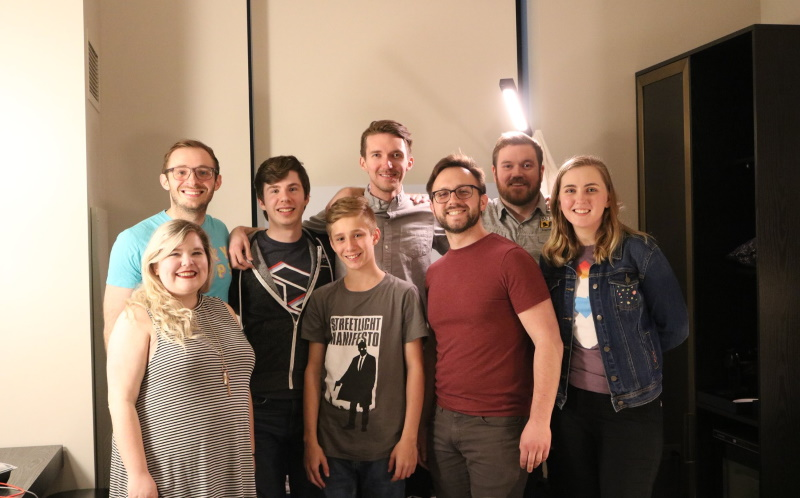

In [17]:
display.Image('images/botar.jpg')

... and eventually wives. It blows my mind to consider how much the whole lot of us have grown.

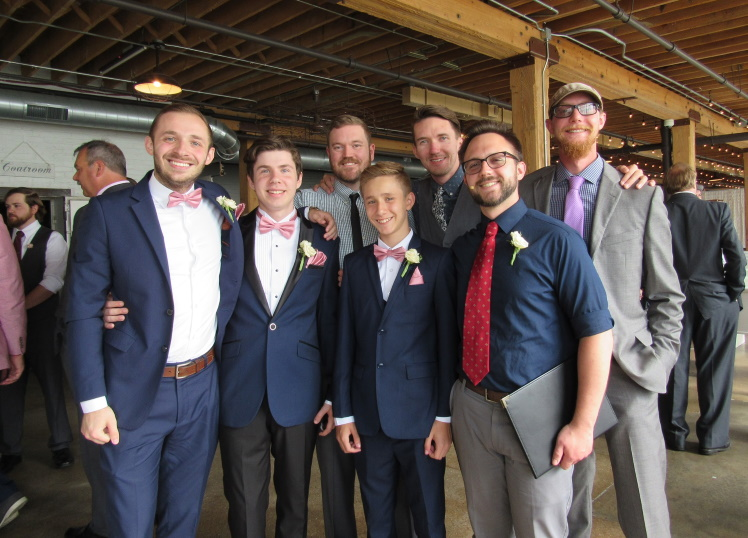

In [18]:
display.Image('images/wedding.jpg')

But I'm so damn thankful that our friendship has stayed just as ridiculous.

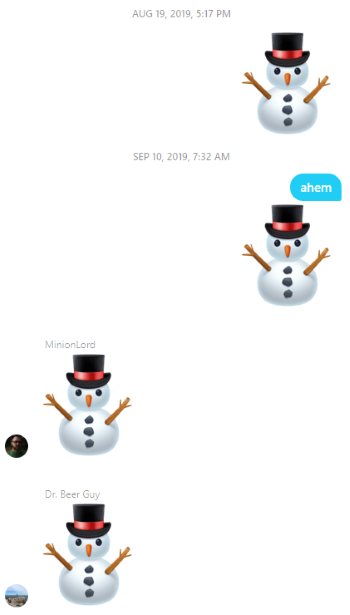

In [19]:
display.Image('images/ahem.PNG')

Also, I can't speak for the other guys.

<br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br><br></br>

But I think I objectively, peaked in High School, lol

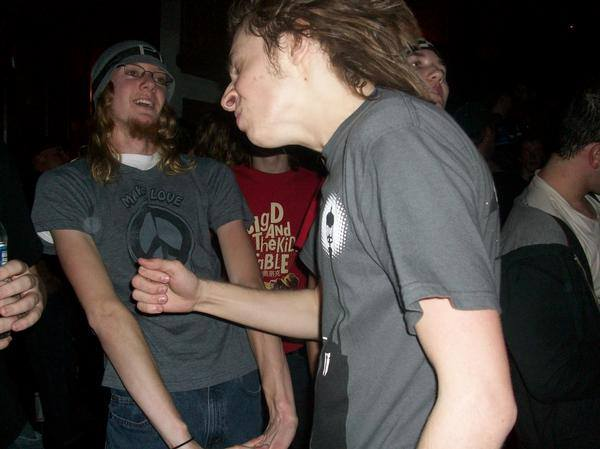

In [20]:
display.Image('images/nostril.jpg')

----------------------



## Walking Away

As always, code hosted on [GitHub](https://github.com/NapsterInBlue/streetlight). You can harass me on Twitter [here](https://twitter.com/NapsterInBlue).

Cheers,


-Nick